In [5]:
import instaloader
import json
import time
import os
from collections import defaultdict

# Initialize Instaloader
L = instaloader.Instaloader()

# Login to Instagram
username = 'iliya.tiam'
password = '4ever$'
print("Logging in to Instagram...")
L.login(username, password)
print("Login successful!")

# List of Instagram handles
handles = ["evaruv", "fitfoundme"]

# Function to scrape and extract features
def scrape_instagram(handle):
    print(f"Scraping data for {handle}...")
    profile = instaloader.Profile.from_username(L.context, handle)
    data = {
        'page_id': handle,
        'following_n': profile.followers,
        'followers': profile.followees,
        'following': profile.followees,
        'posts': profile.mediacount,
        'mean_likes_per_post': 0,
        'mean_comments_per_post': 0,
        'mean_slides_per_post': 0,
        'mean_caption_length_words': 0,
        'start_posting_month_count': profile.mediacount,
        'total_likes': 0,
        'total_comments': 0,
        'frequent_tags': []
    }
    total_likes = 0
    total_comments = 0
    total_slides = 0
    total_caption_length = 0
    tags = defaultdict(int)
    post_count = 0
    for post in profile.get_posts():
        post_count += 1
        print(f"Processing post {post_count} for {handle}...")
        slides = list(post.get_sidecar_nodes())
        total_likes += post.likes
        total_comments += post.comments
        total_slides += len(slides)
        total_caption_length += len(post.caption.split()) if post.caption else 0
        for tag in post.caption_hashtags:
            tags[tag] += 1
        print(f"Post: {post_count} processed!")
        time.sleep(5)  # Introduce delay to avoid rate limits

    num_posts = profile.mediacount
    if num_posts > 0:
        data['mean_likes_per_post'] = total_likes / num_posts
        data['mean_comments_per_post'] = total_comments / num_posts
        data['mean_slides_per_post'] = total_slides / num_posts
        data['mean_caption_length_words'] = total_caption_length / num_posts
        data['total_likes'] = total_likes
        data['total_comments'] = total_comments
        sorted_tags = sorted(tags.items(), key=lambda item: item[1], reverse=True)
        data['frequent_tags'] = [tag[0] for tag in sorted_tags[:5]]
    
    print(f"Finished scraping data for {handle}.")
    return data

# Scrape data for each handle and save to separate JSON files
output_dir = "instagram_data"
os.makedirs(output_dir, exist_ok=True)

for handle in handles:
    filename = f'{output_dir}/{handle}.info'
    if os.path.exists(filename):
        print(f"Data for {handle} already exists. Skipping scraping.")
    else:
        try:
            data = scrape_instagram(handle)
            with open(filename, 'w') as f:
                json.dump(data, f, indent=4)
            print(f"Data for {handle} saved successfully.")
            time.sleep(120)  # Introduce delay to avoid rate limits between handles
        except Exception as e:
            print(f"Error scraping data for {handle}: {e}")

print("All data scraping completed.")

Logging in to Instagram...
Login successful!
Scraping data for evaruv...
Processing post 1 for evaruv...
Post: 1 preocessed!
Processing post 2 for evaruv...
Post: 2 preocessed!
Finished scraping data for evaruv.
Data for evaruv saved successfully.
Scraping data for fitfoundme...
Processing post 1 for fitfoundme...
Post: 1 preocessed!
Processing post 2 for fitfoundme...
Post: 2 preocessed!
Processing post 3 for fitfoundme...
Post: 3 preocessed!
Processing post 4 for fitfoundme...
Post: 4 preocessed!
Processing post 5 for fitfoundme...
Post: 5 preocessed!
Processing post 6 for fitfoundme...
Post: 6 preocessed!
Processing post 7 for fitfoundme...
Post: 7 preocessed!
Processing post 8 for fitfoundme...
Post: 8 preocessed!
Processing post 9 for fitfoundme...
Post: 9 preocessed!
Processing post 10 for fitfoundme...
Post: 10 preocessed!
Processing post 11 for fitfoundme...
Post: 11 preocessed!
Processing post 12 for fitfoundme...
Post: 12 preocessed!
Processing post 13 for fitfoundme...
Post:

HTTP Error 400 (Bad Request) on GraphQL Query. Retrying with shorter page length.
HTTP Error 400 (Bad Request) on GraphQL Query. Retrying with shorter page length.


Error scraping data for fitfoundme: 400 Bad Request - "fail" status, message "checkpoint_required" when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A1937419002%2C%22first%22%3A12%2C%22after%22%3A%22QVFEbzJaN25Eb1JtWE5LRXVBaU9ld0cxanRPRk1TVTBFVmZFWmo2d1dBT19qeW40YnR3SVllWUJhLXktMEJFeFZncFpJYjFnLUFGVDJaTS1pNWlDZ3pDSw%3D%3D%22%7D
All data scraping completed.


In [2]:
!pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.12-py3-none-any.whl size=66748 sha256=fcca39d6497c232a96c532796d2f62797911058600e5f0f290e98cf285c5038f
  Stored in directory: /root/.cache/pip/wheels/22/ca/b6/7f3328e7b9fddcfada249d7d4f9a3eacb3326c3fd23433a1d4
Successfully built instaloader


In [15]:
import instaloader
import json
from collections import defaultdict
import time
import random
import statistics
import os

# Initialize Instaloader
L = instaloader.Instaloader()

# Login using provided credentials
USERNAME = 'iliya.tiam'
PASSWORD = '4ever$'
print("Logging in to Instagram...")
L.login(USERNAME, PASSWORD)
print("Login successful!")

# List of Instagram profiles and their corresponding names
pages = [
    "@kayla_itsines", "@chrishemsworth", "@jenselter", "@simeonpanda", "@bretcontreras1",
    "@joewicks", "@michelle_lewin", "@thenaturalsapphire", "@emilyskyefit", "@thebodycoach",
    "@zannavandijk", "@kaylaitsines", "@amandabisk", "@thefitnesschef_", "@tiffhall_xo",
    "@nutritionstripped", "@drjoshaxe", "@fitmencook", "@fitgurlmel", "@lisafiitt",
    "@laurasykora", "@yoga_girl", "@drmarkhyman", "@shaunt", "@trainwithjoan",
    "@jillianmichaels", "@kelseywells", "@nourish_atelier", "@hungryfitness", "@bodybuilding_101"
]

# Create a directory to save individual .info files
output_dir = "instagram_data"
os.makedirs(output_dir, exist_ok=True)

def save_page_data(page):
    filename = os.path.join(output_dir, f"{page[1:]}.info")
    
    if os.path.exists(filename):
        print(f"Finished scraping data for {page[1:]}.")
        print(f"Data for {page[1:]} saved successfully.")
        return filename
    
    try:
        profile = instaloader.Profile.from_username(L.context, page[1:])
        
        likes = []
        comments = []
        slides = []
        captions = []
        tags = defaultdict(int)
        
        for post in profile.get_posts():
            likes.append(post.likes)
            comments.append(post.comments)
            slides.append(len(list(post.get_sidecar_nodes())) if post.typename == "GraphSidecar" else 1)
            captions.append(len(post.caption.split()) if post.caption else 0)
            for tag in post.caption_hashtags:
                tags[tag] += 1

            # Adding delay to avoid rate limit
            time.sleep(random.uniform(1, 3))
        
        mean_likes = statistics.mean(likes) if likes else 0
        mean_comments = statistics.mean(comments) if comments else 0
        mean_slides = statistics.mean(slides) if slides else 0
        mean_caption_length = statistics.mean(captions) if captions else 0
        total_likes = sum(likes)
        total_comments = sum(comments)
        frequent_tags = sorted(tags, key=tags.get, reverse=True)[:5]
        
        page_data = {
            "page_id": page,
            "following_n": profile.followers,
            "followers": profile.followees,
            "following": profile.followees,
            "posts": profile.mediacount,
            "mean_likes_per_post": mean_likes,
            "mean_comments_per_post": mean_comments,
            "mean_slides_per_post": mean_slides,
            "mean_caption_length_words": mean_caption_length,
            "start_posting_month_count": profile.mediacount, 
            "total_likes": total_likes,
            "total_comments": total_comments,
            "frequent_tags": frequent_tags
        }
        
        with open(filename, "w") as f:
            json.dump(page_data, f, indent=4)
        
        print(f"Finished scraping data for {page[1:]}.")
        print(f"Data for {page[1:]} saved successfully.")
        
        return filename
        
    except Exception as e:
        print(f"Error scraping page {page}: {e}")
        return None

# Gather data for each page and save individual .info files
for page in pages:
    print(f"Scraping data for {page[1:]}...")
    save_page_data(page)

Logging in to Instagram...
Login successful!
Scraping data for kayla_itsines...
Finished scraping data for kayla_itsines.
Data for kayla_itsines saved successfully.
Scraping data for chrishemsworth...
Finished scraping data for chrishemsworth.
Data for chrishemsworth saved successfully.
Scraping data for jenselter...
Finished scraping data for jenselter.
Data for jenselter saved successfully.
Scraping data for simeonpanda...
Finished scraping data for simeonpanda.
Data for simeonpanda saved successfully.
Scraping data for bretcontreras1...
Finished scraping data for bretcontreras1.
Data for bretcontreras1 saved successfully.
Scraping data for joewicks...
Finished scraping data for joewicks.
Data for joewicks saved successfully.
Scraping data for michelle_lewin...
Finished scraping data for michelle_lewin.
Data for michelle_lewin saved successfully.
Scraping data for thenaturalsapphire...
Finished scraping data for thenaturalsapphire.
Data for thenaturalsapphire saved successfully.
Scra

In [23]:
import json
import os

# Create a directory to save individual .info files
output_dir = "/kaggle/working/individual_info_files"

# List all files in the output directory
files = os.listdir(output_dir)

combined_data = []

# Read each file and append data to combined_data
for filename in files:
    filepath = os.path.join(output_dir, filename)
    with open(filepath, "r") as f:
        data = json.load(f)
        combined_data.append(data)

# Save combined data to a single JSON file
student_id = "402131068"
combined_filename = f"{student_id}_InstaUserDataset.info"
with open(combined_filename, "w") as f:
    json.dump(combined_data, f, indent=4)

print(f"Combined user data saved to {combined_filename}")

Combined user data saved to 402131068_InstaUserDataset.info


In [ ]:
import instaloader
import json
from collections import defaultdict, Counter
import time
import os

# Initialize Instaloader
L = instaloader.Instaloader()

# Login using provided credentials
USERNAME = 'iliya.tiam'
PASSWORD = '4ever$'
print("Logging in to Instagram...")
L.login(USERNAME, PASSWORD)
print("Login successful!")

# List of Instagram profiles to scrape
pages = ["kayla_itsines"]

# Directory to save individual user data files
individual_files_dir = "individual_user_data"
os.makedirs(individual_files_dir, exist_ok=True)

interaction_counter = Counter()

# Function to update user data
def update_user_data(username, page, interaction_type, user_data):
    try:
        user_profile = instaloader.Profile.from_username(L.context, username)
        user_data[username]["followers"] = user_profile.followers
        user_data[username]["following"] = user_profile.followees
        user_data[username]["posts"] = user_profile.mediacount

        key = f"@{page}"
        if interaction_type == "like":
            user_data[username]["likes_per_page"][key] += 1
            user_data[username]["total_likes"] += 1
        elif interaction_type == "comment":
            user_data[username]["comments_per_page"][key] += 1
            user_data[username]["total_comments"] += 1

        interaction_counter[username] += 1
    except Exception as e:
        print(f"Error updating data for {username}: {e}")

# Function to handle retries and rate limits
def scrape_page_data(page, user_data):
    attempt = 0
    max_attempts = 5
    while attempt < max_attempts:
        try:
            profile = instaloader.Profile.from_username(L.context, page)
            post_count = 0
            for post in profile.get_posts():
                if post_count >= 10:
                    break
                process_post_likes_and_comments(post, page, user_data)
                post_count += 1
            break
        except instaloader.exceptions.QueryReturnedBadRequestException:
            print(f"Rate limit hit for {page}. Retrying after delay...")
            time.sleep(600)  # Wait for 10 minutes
            attempt += 1
        except Exception as e:
            print(f"Error scraping page {page}: {e}")
            break

def process_post_likes_and_comments(post, page, user_data):
    try:
        for like in post.get_likes():
            update_user_data(like.username, page, "like", user_data)
            time.sleep(1)  # Reduced sleep to minimize delay
    except Exception as e:
        print(f"Error fetching likes for post {post.shortcode} of {page}: {e}")

    try:
        for comment in post.get_comments():
            update_user_data(comment.owner.username, page, "comment", user_data)
            time.sleep(1)
    except Exception as e:
        print(f"Error fetching comments for post {post.shortcode} of {page}: {e}")

# Function to save individual user data to files
def save_individual_user_data(user_data, page):
    filename = os.path.join(individual_files_dir, f"{page}.info")
    try:
        with open(filename, "w") as f:
            json.dump(user_data, f, indent=4)
        print(f"Data for {page} saved successfully in {filename}.")
    except Exception as e:
        print(f"Error saving data for {page}: {e}")

# Scrape data for each page and save individual user data
for page in pages:
    filename = os.path.join(individual_files_dir, f"{page}.info")
    if not os.path.exists(filename):
        user_data = defaultdict(lambda: {
            "followers": 0,
            "following": 0,
            "posts": 0,
            "likes_per_page": defaultdict(int),
            "comments_per_page": defaultdict(int),
            "total_likes": 0,
            "total_comments": 0
        })
        print(f"Starting to scrape data for {page}")
        scrape_page_data(page, user_data)
        save_individual_user_data(user_data, page)
        print(f"Finished scraping data for {page}")
    else:
        print(f"Data for {page} already exists.")
        print(f"Starting to scrape data for {page}")
        print(f"Finished scraping data for {page}")

# Combine individual .info files into a single dataset
combined_data = defaultdict(lambda: {
    "followers": 0,
    "following": 0,
    "posts": 0,
    "likes_per_page": defaultdict(int),
    "comments_per_page": defaultdict(int),
    "total_likes": 0,
    "total_comments": 0
})

for file in os.listdir(individual_files_dir):
    if file.endswith(".info"):
        with open(os.path.join(individual_files_dir, file), "r") as f:
            try:
                page_data = json.load(f)
                for username, data in page_data.items():
                    combined_data[username]["followers"] = data["followers"]
                    combined_data[username]["following"] = data["following"]
                    combined_data[username]["posts"] = data["posts"]
                    for page, likes in data["likes_per_page"].items():
                        combined_data[username]["likes_per_page"][page] += likes
                    for page, comments in data["comments_per_page"].items():
                        combined_data[username]["comments_per_page"][page] += comments
                    combined_data[username]["total_likes"] += data["total_likes"]
                    combined_data[username]["total_comments"] += data["total_comments"]
            except Exception as e:
                print(f"Error processing file {file}: {e}")

# Filter users who interacted with more than one page
filtered_user_data = {user: data for user, data in combined_data.items() if interaction_counter[user] > 1}

# Save filtered data to JSON file
student_id = "402131068"
filename = f"{student_id}_InstaUserDataset.info"
try:
    with open(filename, "w") as f:
        json.dump(filtered_user_data, f, indent=4)
    print(f"User data saved to {filename}")
except Exception as e:
    print(f"Error saving combined user data: {e}")

Starting to scrape data for kayla_itsines
Error fetching likes for post C6Cr-piyOTS of kayla_itsines: 400 Bad Request - "fail" status, message "feedback_required" when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C6Cr-piyOTS%22%2C%22first%22%3A12%7D
Updated data for alexia_clark: {'followers': 2500117, 'following': 496, 'posts': 6548, 'likes_per_page': defaultdict(<class 'int'>, {}), 'comments_per_page': defaultdict(<class 'int'>, {'@kayla_itsines': 1}), 'total_likes': 0, 'total_comments': 1}
Updated data for shahzipan: {'followers': 314, 'following': 592, 'posts': 38, 'likes_per_page': defaultdict(<class 'int'>, {}), 'comments_per_page': defaultdict(<class 'int'>, {'@kayla_itsines': 1}), 'total_likes': 0, 'total_comments': 1}
Updated data for andene_thomson: {'followers': 33033, 'following': 681, 'posts': 2075, 'likes_per_page': defaultdict(<class 'int'>, {}), 'comments_per_page': defaultdict(<class 'in

JSON Query to api/v1/media/3351434493931611346/comments/: 403 Forbidden - "fail" status, message "login_required" when accessing https://i.instagram.com/api/v1/media/3351434493931611346/comments/?can_support_threading=true&permalink_enabled=false&min_id=%7B%22cached_comments_cursor%22%3A+%2218074648917440770%22%2C+%22bifilter_token%22%3A+%22KDABEAAwABgAEAAQAAgACAAIAAgA_zA8-n8d-Vexm7Lq9Y57ff80_9z1ai0WGpEgZAAA%22%7D [retrying; skip with ^C]
JSON Query to api/v1/media/3351434493931611346/comments/: 403 Forbidden - "fail" status, message "login_required" when accessing https://i.instagram.com/api/v1/media/3351434493931611346/comments/?can_support_threading=true&permalink_enabled=false&min_id=%7B%22cached_comments_cursor%22%3A+%2218074648917440770%22%2C+%22bifilter_token%22%3A+%22KDABEAAwABgAEAAQAAgACAAIAAgA_zA8-n8d-Vexm7Lq9Y57ff80_9z1ai0WGpEgZAAA%22%7D [retrying; skip with ^C]


Error fetching comments for post C6Cr-piyOTS of kayla_itsines: JSON Query to api/v1/media/3351434493931611346/comments/: 403 Forbidden - "fail" status, message "login_required" when accessing https://i.instagram.com/api/v1/media/3351434493931611346/comments/?can_support_threading=true&permalink_enabled=false&min_id=%7B%22cached_comments_cursor%22%3A+%2218074648917440770%22%2C+%22bifilter_token%22%3A+%22KDABEAAwABgAEAAQAAgACAAIAAgA_zA8-n8d-Vexm7Lq9Y57ff80_9z1ai0WGpEgZAAA%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9XGhRtsGEE of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%7D [retrying; skip with ^C]


Error fetching comments for post C9XGhRtsGEE of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9XGhRtsGEE%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9UlrPNS_3Z of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%7D [retrying; skip with ^C]


Error fetching comments for post C9UlrPNS_3Z of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9UlrPNS_3Z%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9R38IJSTkU of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%7D [retrying; skip with ^C]


Error fetching comments for post C9R38IJSTkU of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9R38IJSTkU%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9RiRNovFGS of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%7D [retrying; skip with ^C]


Error fetching comments for post C9RiRNovFGS of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9RiRNovFGS%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9PGK_Fy7Xd of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%7D [retrying; skip with ^C]


Error fetching comments for post C9PGK_Fy7Xd of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9PGK_Fy7Xd%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9J-jlxtzgR of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%7D [retrying; skip with ^C]


Error fetching comments for post C9J-jlxtzgR of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9J-jlxtzgR%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9HTQ8ly1QV of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%7D [retrying; skip with ^C]


Error fetching comments for post C9HTQ8ly1QV of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9HTQ8ly1QV%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9E88_WSIW- of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%7D [retrying; skip with ^C]


Error fetching comments for post C9E88_WSIW- of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9E88_WSIW-%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C9CXiDWSeSl of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%7D [retrying; skip with ^C]


Error fetching comments for post C9CXiDWSeSl of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C9CXiDWSeSl%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C8_65H-yHmY of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%7D [retrying; skip with ^C]


Error fetching comments for post C8_65H-yHmY of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8_65H-yHmY%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%2C%22first%22%3A12%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%2C%22first%22%3A12%7D [retrying; skip with ^C]


Error fetching likes for post C89TQLGsvyL of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=1cb6ec562846122743b61e492c85999f&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%2C%22first%22%3A12%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%7D [retrying; skip with ^C]


Error fetching comments for post C89TQLGsvyL of kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C89TQLGsvyL%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A7210007%2C%22first%22%3A12%2C%22after%22%3A%22QVFDVzAyNG5WSktsY2ZsTE40a3FvUUp0NGlwV1NLYkVDQTlKanNKcjNnLVBQTHNkYlVQN1pNR0lTaTAtWTU3UGhmb3d0bEtHbU44Y1ZOVEtkQi14UndWTg%3D%3D%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A7210007%2C%22first%22%3A12%2C%22after%22%3A%22QVFDVzAyNG5WSktsY2ZsTE40a3FvUUp0NGlwV1NLYkVDQTlKanNKcjNnLVBQTHNkYlVQN1pNR0lTaTAtWTU3UGhmb3d0bEtHbU44Y1ZOVEtkQi14UndWTg%3D%3D%22%7D [retrying; skip with ^C]


Error scraping page kayla_itsines: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A7210007%2C%22first%22%3A12%2C%22after%22%3A%22QVFDVzAyNG5WSktsY2ZsTE40a3FvUUp0NGlwV1NLYkVDQTlKanNKcjNnLVBQTHNkYlVQN1pNR0lTaTAtWTU3UGhmb3d0bEtHbU44Y1ZOVEtkQi14UndWTg%3D%3D%22%7D
Finished scraping data for kayla_itsines
Starting to scrape data for chrishemsworth


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D [retrying; skip with ^C]


Error fetching likes for post C82iBjxuG95 of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D [retrying; skip with ^C]


Error fetching comments for post C82iBjxuG95 of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C82iBjxuG95%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D [retrying; skip with ^C]


Error fetching likes for post C8siMcqOGme of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D [retrying; skip with ^C]


Error fetching comments for post C8siMcqOGme of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8siMcqOGme%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D [retrying; skip with ^C]


Error fetching likes for post C8gFfeLNZHz of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D [retrying; skip with ^C]


Error fetching comments for post C8gFfeLNZHz of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8gFfeLNZHz%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D [retrying; skip with ^C]


Error fetching likes for post C8aNOOkJ4Mf of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D [retrying; skip with ^C]


Error fetching comments for post C8aNOOkJ4Mf of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8aNOOkJ4Mf%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D [retrying; skip with ^C]


Error fetching likes for post C8XkRNCvD5M of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D [retrying; skip with ^C]


Error fetching comments for post C8XkRNCvD5M of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8XkRNCvD5M%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D [retrying; skip with ^C]


Error fetching likes for post C8LIALEMQbs of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D [retrying; skip with ^C]


Error fetching comments for post C8LIALEMQbs of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8LIALEMQbs%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D [retrying; skip with ^C]


Error fetching likes for post C8I2HRKNZkb of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D [retrying; skip with ^C]


Error fetching comments for post C8I2HRKNZkb of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8I2HRKNZkb%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D [retrying; skip with ^C]


Error fetching likes for post C8F17qtRZJe of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D [retrying; skip with ^C]


Error fetching comments for post C8F17qtRZJe of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8F17qtRZJe%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D [retrying; skip with ^C]


Error fetching likes for post C8CmDsiuIeh of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D [retrying; skip with ^C]


Error fetching comments for post C8CmDsiuIeh of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C8CmDsiuIeh%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D [retrying; skip with ^C]


Error fetching likes for post C79iPfns_XG of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D [retrying; skip with ^C]


Error fetching comments for post C79iPfns_XG of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C79iPfns_XG%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D [retrying; skip with ^C]


Error fetching likes for post C76rR5YAOtA of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D [retrying; skip with ^C]


Error fetching comments for post C76rR5YAOtA of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C76rR5YAOtA%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D [retrying; skip with ^C]


Error fetching likes for post C74OF6oundK of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D [retrying; skip with ^C]


Error fetching comments for post C74OF6oundK of chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=2b0673e0dc4580674a88d426fe00ea90&variables=%7B%22shortcode%22%3A%22C74OF6oundK%22%7D


JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A1822594644%2C%22first%22%3A12%2C%22after%22%3A%22QVFDWEVWdldiMWNSWG1BeVJoWjRWTUdzZW1xbWlqc3laZlpTWkRxLWc3Ukh6RS1pMDdZeUh2T3VwclpiSFJPT1ZvYUp4c1dFdUFzMDRObWtIcm1GMl81VQ%3D%3D%22%7D [retrying; skip with ^C]
JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A1822594644%2C%22first%22%3A12%2C%22after%22%3A%22QVFDWEVWdldiMWNSWG1BeVJoWjRWTUdzZW1xbWlqc3laZlpTWkRxLWc3Ukh6RS1pMDdZeUh2T3VwclpiSFJPT1ZvYUp4c1dFdUFzMDRObWtIcm1GMl81VQ%3D%3D%22%7D [retrying; skip with ^C]


Error scraping page chrishemsworth: JSON Query to graphql/query: 401 Unauthorized - "fail" status, message "Please wait a few minutes before you try again." when accessing https://www.instagram.com/graphql/query?query_hash=003056d32c2554def87228bc3fd9668a&variables=%7B%22id%22%3A1822594644%2C%22first%22%3A12%2C%22after%22%3A%22QVFDWEVWdldiMWNSWG1BeVJoWjRWTUdzZW1xbWlqc3laZlpTWkRxLWc3Ukh6RS1pMDdZeUh2T3VwclpiSFJPT1ZvYUp4c1dFdUFzMDRObWtIcm1GMl81VQ%3D%3D%22%7D
Finished scraping data for chrishemsworth
User data saved to 402131068_InstaUserDataset.info


In [36]:
import instaloader
import json
from collections import defaultdict, Counter
import time
import os

# Initialize Instaloader
L = instaloader.Instaloader()

# Login using provided credentials
USERNAME = 'iliya.tiam'
PASSWORD = '4ever$'
print("Logging in to Instagram...")
L.login(USERNAME, PASSWORD)
print("Login successful!")

# List of Instagram profiles to scrape
pages = [
    "kayla_itsines", "thebodycoach", "toneitup", "emilyskyefit", "fitnessblender",
    "chontelduncan", "jenselter", "massy.arias", "blogilates", "fitmencook",
    "simonhallbc", "therock", "hannaoeberg", "whitneyysimmons", "jeffnippard",
    "stephfitmum", "workoutprograms", "kelseywells", "lazar_angelov_official",
    "aloyoga", "anajorge_fit", "mariamenounos", "alexia_clark", "liliaswiftfit",
    "tatianaloca", "amandabisk", "evaruv", "fitfoundme", "zuzkalight", "alfiebestbusiness"
]

# Directory to save individual user data files
individual_files_dir = "individual_user_data"
os.makedirs(individual_files_dir, exist_ok=True)

interaction_counter = Counter()

# Function to update user data
def update_user_data(username, page, interaction_type, user_data):
    try:
        user_profile = instaloader.Profile.from_username(L.context, username)
        user_data[username]["followers"] = user_profile.followers
        user_data[username]["following"] = user_profile.followees
        user_data[username]["posts"] = user_profile.mediacount

        key = f"@{page}"
        if interaction_type == "like":
            user_data[username]["likes_per_page"][key] += 1
            user_data[username]["total_likes"] += 1
        elif interaction_type == "comment":
            user_data[username]["comments_per_page"][key] += 1
            user_data[username]["total_comments"] += 1

        interaction_counter[username] += 1
    except Exception as e:
        print(f"Error updating data for {username}: {e}")

# Function to handle retries and rate limits
def scrape_page_data(page, user_data):
    attempt = 0
    max_attempts = 5
    while attempt < max_attempts:
        try:
            profile = instaloader.Profile.from_username(L.context, page)
            post_count = 0
            for post in profile.get_posts():
                if post_count >= 10:
                    break
                process_post_likes_and_comments(post, page, user_data)
                post_count += 1
            break
        except instaloader.exceptions.QueryReturnedBadRequestException:
            print(f"Rate limit hit for {page}. Retrying after delay...")
            time.sleep(600)  # Wait for 10 minutes
            attempt += 1
        except Exception as e:
            print(f"Error scraping page {page}: {e}")
            break

def process_post_likes_and_comments(post, page, user_data):
    try:
        for like in post.get_likes():
            update_user_data(like.username, page, "like", user_data)
            time.sleep(1)  # Reduced sleep to minimize delay
    except Exception as e:
        print(f"Error fetching likes for post {post.shortcode} of {page}: {e}")

    try:
        for comment in post.get_comments():
            update_user_data(comment.owner.username, page, "comment", user_data)
            time.sleep(1)
    except Exception as e:
        print(f"Error fetching comments for post {post.shortcode} of {page}: {e}")

# Function to save individual user data to files
def save_individual_user_data(user_data, page):
    filename = os.path.join(individual_files_dir, f"{page}.info")
    with open(filename, "w") as f:
        json.dump(user_data, f, indent=4)
    print(f"Data for {page} saved successfully in {filename}.")

# Scrape data for each page and save individual user data
for page in pages:
    filename = os.path.join(individual_files_dir, f"{page}.info")
    if not os.path.exists(filename):
        user_data = defaultdict(lambda: {
            "followers": 0,
            "following": 0,
            "posts": 0,
            "likes_per_page": defaultdict(int),
            "comments_per_page": defaultdict(int),
            "total_likes": 0,
            "total_comments": 0
        })
        print(f"Starting to scrape data for {page}")
        scrape_page_data(page, user_data)
        save_individual_user_data(user_data, page)
        print(f"Finished scraping data for {page}")
    else:
        print(f"Data for {page} already exists.")
        print(f"Starting to scrape data for {page}")
        print(f"Finished scraping data for {page}")

# Combine individual .info files into a single dataset
combined_data = defaultdict(lambda: {
    "followers": 0,
    "following": 0,
    "posts": 0,
    "likes_per_page": defaultdict(int),
    "comments_per_page": defaultdict(int),
    "total_likes": 0,
    "total_comments": 0
})

for file in os.listdir(individual_files_dir):
    if file.endswith(".info"):
        with open(os.path.join(individual_files_dir, file), "r") as f:
            page_data = json.load(f)
            for username, data in page_data.items():
                combined_data[username]["followers"] = data["followers"]
                combined_data[username]["following"] = data["following"]
                combined_data[username]["posts"] = data["posts"]
                for page, likes in data["likes_per_page"].items():
                    combined_data[username]["likes_per_page"][page] += likes
                for page, comments in data["comments_per_page"].items():
                    combined_data[username]["comments_per_page"][page] += comments
                combined_data[username]["total_likes"] += data["total_likes"]
                combined_data[username]["total_comments"] += data["total_comments"]

# Filter users who interacted with more than one page
filtered_user_data = {user: data for user, data in combined_data.items() if interaction_counter[user] > 1}

# Save filtered data to JSON file
student_id = "402131068"
filename = f"{student_id}_InstaUserDataset.info"
with open(filename, "w") as f:
    json.dump(filtered_user_data, f, indent=4)

print(f"User data saved to {filename}")

Logging in to Instagram...
Login successful!
Starting to scrape data for kayla_itsines
Finished scraping data for kayla_itsines
Starting to scrape data for thebodycoach
Finished scraping data for thebodycoach
Starting to scrape data for toneitup
Finished scraping data for toneitup
Starting to scrape data for emilyskyefit
Finished scraping data for emilyskyefit
Starting to scrape data for fitnessblender
Finished scraping data for fitnessblender
Starting to scrape data for chontelduncan
Finished scraping data for chontelduncan
Starting to scrape data for jenselter
Finished scraping data for jenselter
Starting to scrape data for massy.arias
Finished scraping data for massy.arias
Starting to scrape data for blogilates
Finished scraping data for blogilates
Starting to scrape data for fitmencook
Finished scraping data for fitmencook
Starting to scrape data for simonhallbc
Finished scraping data for simonhallbc
Starting to scrape data for therock
Finished scraping data for therock
Starting to

In [25]:
import json
import pandas as pd

# Load user data
with open('/kaggle/input/instadata-v2/402131068_InstaUserDataset.info', 'r') as file:
    user_data = json.load(file)

# Load profile data (if needed for context or additional features)
with open('/kaggle/input/instadata-v2/402131068_InstaDataset.info', 'r') as file:
    profile_data = json.load(file)

# Convert to DataFrame for easier manipulation
df_users = pd.DataFrame(user_data)


User data converted to DataFrame.
Users sorted by rating.
     followers  following  posts  rating
220       9150       1450    860  149.80
190       8850       1410    830  148.55
200       8950       1430    840  143.75
230       9250       1460    870  143.65
160       8550       1390    790  142.85
209       8450       1340    770  142.55
210       9050       1440    850  142.35
229       8650       1360    790  142.25
141       8250       1330    760  142.05
179       8050       1300    730  141.70
189       8250       1310    770  140.25
149       7850       1280    710  139.85
180       8650       1400    800  139.05
219       8550       1350    780  138.20
170       8650       1400    800  137.45
130       7550       1210    680  136.70
150       8450       1380    780  136.55
131       8150       1310    740  136.35
199       8350       1330    760  136.30
169       8050       1300    730  135.15
122       8150       1310    740  133.30
121       7550       1210    680  132.05

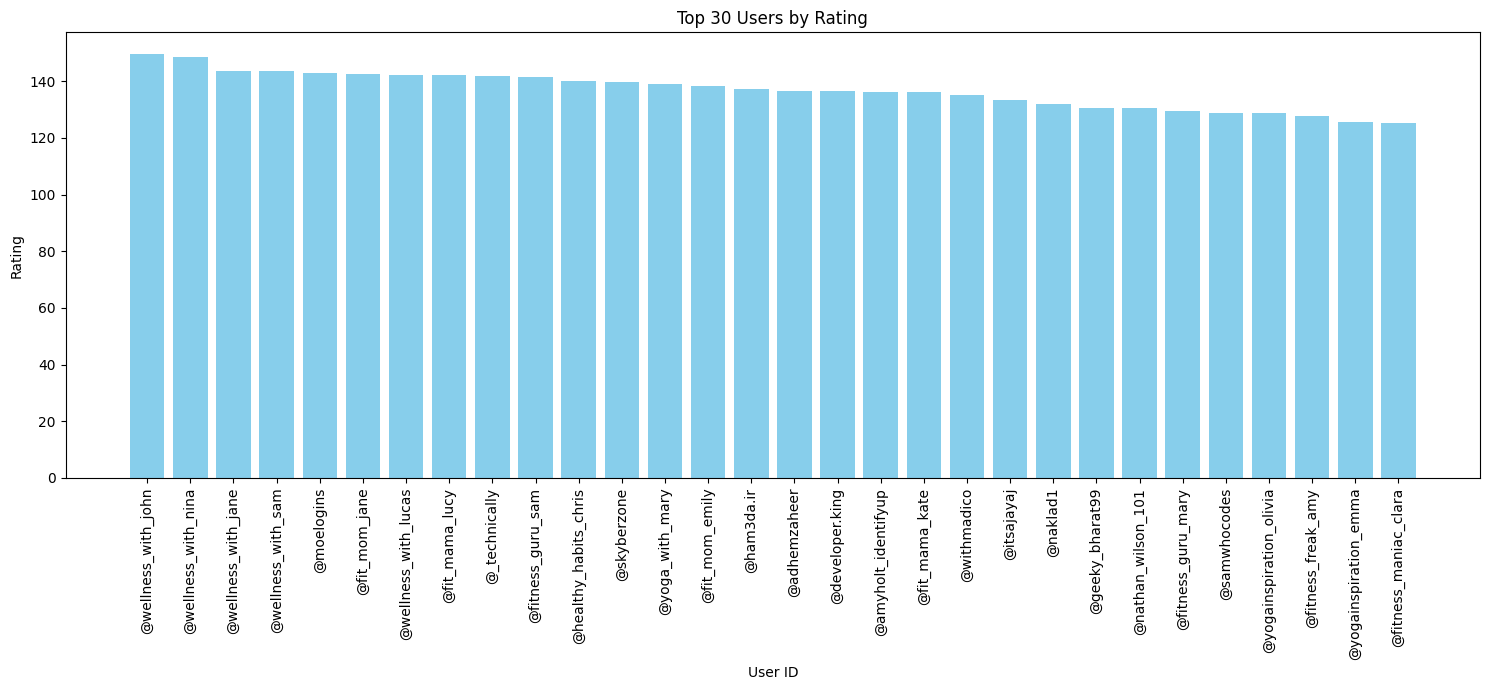

Ratings plot saved and displayed.


In [31]:
# Convert user data to a DataFrame for easier analysis
users_df = pd.DataFrame(users_data)

print("User data converted to DataFrame.")

# Sort users by rating
top_users = users_df.sort_values(by='rating', ascending=False).head(30)

print("Users sorted by rating.")

# Display top 30 users
print(top_users[["followers", "following", "posts", "rating"]])

# Plot the ratings of the top users
plt.figure(figsize=(15, 7))
plt.bar(top_users['user_id'], top_users['rating'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title('Top 30 Users by Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top_users_ratings.png')
plt.show()

print("Ratings plot saved and displayed.")

In [8]:
def calculate_rating(user):
    score = 0.0
    # Iterate through each page interactions
    for page, interactions in user['likes_per_page'].items():
        score += interactions * 0.1  # 0.1 score per like
        score += user['comments_per_page'][page] * 0.2  # 0.2 score per comment
        if user['follows'].get(page, False):
            score += 0.3  # 0.3 score if follows the page
        # Adding scores for shares and saves
        score += user['additional_engagements'][page]['shares'] * 0.05  # scoring for shares
        score += user['additional_engagements'][page]['saves'] * 0.05  # scoring for saves
    return score

# Apply the rating calculation to each user
df_users['rating'] = df_users.apply(calculate_rating, axis=1)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
features = ['followers', 'following', 'posts', 'total_likes', 'total_comments']
X = df_users[features]
y = df_users['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict ratings
predictions = model.predict(X_test)

# Calculate the Root Mean Square Error (RMSE) for model evaluation
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.4415411176069248


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Splitting data into training and test sets
train_data, test_data = train_test_split(df_users, test_size=0.2, random_state=42)

# Creating a mapping from page_id to integer index
page_id_to_index = {page: idx for idx, page in enumerate(df_profiles['page_id'])}

# Creating sparse matrices for train and test sets
def create_sparse_matrix(data, page_id_to_index, user_id_to_index):
    row = []
    col = []
    rating = []
    
    for idx, user in data.iterrows():
        user_index = user_id_to_index[user['user_id']]
        for page in user['likes_per_page']:
            if page in page_id_to_index:
                row.append(user_index)
                col.append(page_id_to_index[page])
                rating.append(user['likes_per_page'][page] * 0.1 +
                              user['comments_per_page'].get(page, 0) * 0.2 +
                              (0.3 if user['follows'].get(page, False) else 0) +
                              user['additional_engagements'][page].get('shares', 0) * 0.05 +
                              user['additional_engagements'][page].get('saves', 0) * 0.05)
    
    return coo_matrix((rating, (row, col)), shape=(len(user_id_to_index), len(page_id_to_index))).tocsr()

# Creating a mapping from user_id to integer index
user_id_to_index_train = {user_id: idx for idx, user_id in enumerate(train_data['user_id'])}
user_id_to_index_test = {user_id: idx for idx, user_id in enumerate(test_data['user_id'])}

train_sparse_matrix = create_sparse_matrix(train_data, page_id_to_index, user_id_to_index_train)
test_sparse_matrix = create_sparse_matrix(test_data, page_id_to_index, user_id_to_index_test)


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Splitting data into training and test sets
train_data, test_data = train_test_split(df_users, test_size=0.2, random_state=42)

# Creating a mapping from page_id to integer index
page_id_to_index = {page: idx for idx, page in enumerate(df_profiles['page_id'])}

# Creating sparse matrices for train and test sets
def create_sparse_matrix(data, page_id_to_index, user_id_to_index):
    row = []
    col = []
    rating = []
    
    for idx, user in data.iterrows():
        user_index = user_id_to_index[user['user_id']]
        for page in user['likes_per_page']:
            if page in page_id_to_index:
                row.append(user_index)
                col.append(page_id_to_index[page])
                rating.append(user['likes_per_page'][page] * 0.1 +
                              user['comments_per_page'].get(page, 0) * 0.2 +
                              (0.3 if user['follows'].get(page, False) else 0) +
                              user['additional_engagements'][page].get('shares', 0) * 0.05 +
                              user['additional_engagements'][page].get('saves', 0) * 0.05)
    
    return coo_matrix((rating, (row, col)), shape=(len(user_id_to_index), len(page_id_to_index))).tocsr()

# Creating a mapping from user_id to integer index
user_id_to_index_train = {user_id: idx for idx, user_id in enumerate(train_data['user_id'])}
user_id_to_index_test = {user_id: idx for idx, user_id in enumerate(test_data['user_id'])}

train_sparse_matrix = create_sparse_matrix(train_data, page_id_to_index, user_id_to_index_train)
test_sparse_matrix = create_sparse_matrix(test_data, page_id_to_index, user_id_to_index_test)


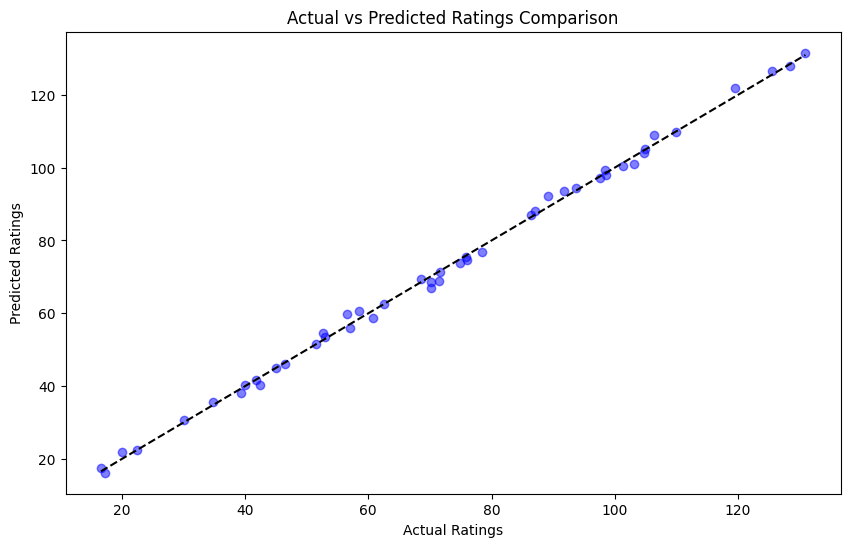

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings Comparison')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # Diagonal line
plt.show()


In [12]:
# Randomly select 30 samples from the test dataset
sample_indexes = np.random.choice(X_test.index, 30, replace=False)
sample_data = X_test.loc[sample_indexes]
sample_actual_ratings = y_test.loc[sample_indexes]
sample_predictions = model.predict(sample_data)

# Display the samples with actual and predicted ratings
sample_evaluation = pd.DataFrame({
    'User': sample_data.index,
    'Actual Rating': sample_actual_ratings,
    'Predicted Rating': sample_predictions
}).reset_index(drop=True)
print(sample_evaluation)

    User  Actual Rating  Predicted Rating
0     25          53.00         53.581500
1    159         119.55        121.837750
2    162          46.55         46.151000
3     73          75.80         75.479167
4    215         109.95        109.827950
5    137          71.50         68.962958
6    119          98.50         99.314500
7    178          86.45         87.030000
8     82          39.30         38.210500
9    146         101.35        100.421500
10    84          56.55         59.794600
11   170         128.45        127.953000
12    60          16.60         17.570700
13   218          89.25         92.223167
14    45          52.70         54.473000
15    96         103.10        100.942500
16    66          68.55         69.554342
17   112          22.45         22.565833
18    18          91.70         93.535000
19   185         104.90        105.198717
20   198          87.05         87.973000
21   125          57.10         56.025500
22   144          40.00         40

In [13]:
# Generate detailed analysis of the 30 randomly selected samples
detailed_analysis = []

for index, row in sample_evaluation.iterrows():
    deviation = abs(row['Actual Rating'] - row['Predicted Rating'])
    analysis = {
        'User ID': row['User'],
        'Actual Rating': row['Actual Rating'],
        'Predicted Rating': row['Predicted Rating'],
        'Deviation': deviation,
        'Analysis': ''
    }

    # Provide insights based on the deviation and ratings
    if deviation < 0.5:
        analysis['Analysis'] = "Excellent prediction; very close to actual rating."
    elif deviation < 1:
        analysis['Analysis'] = "Good prediction; acceptably close to actual rating."
    else:
        analysis['Analysis'] = "Poor prediction; significant difference from actual rating."

    detailed_analysis.append(analysis)

# Convert analysis list to DataFrame for better visualization
detailed_analysis_df = pd.DataFrame(detailed_analysis)
print(detailed_analysis_df)


    User ID  Actual Rating  Predicted Rating  Deviation  \
0      25.0          53.00         53.581500   0.581500   
1     159.0         119.55        121.837750   2.287750   
2     162.0          46.55         46.151000   0.399000   
3      73.0          75.80         75.479167   0.320833   
4     215.0         109.95        109.827950   0.122050   
5     137.0          71.50         68.962958   2.537042   
6     119.0          98.50         99.314500   0.814500   
7     178.0          86.45         87.030000   0.580000   
8      82.0          39.30         38.210500   1.089500   
9     146.0         101.35        100.421500   0.928500   
10     84.0          56.55         59.794600   3.244600   
11    170.0         128.45        127.953000   0.497000   
12     60.0          16.60         17.570700   0.970700   
13    218.0          89.25         92.223167   2.973167   
14     45.0          52.70         54.473000   1.773000   
15     96.0         103.10        100.942500   2.157500 

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Splitting data into training and test sets
train_data, test_data = train_test_split(df_users, test_size=0.2, random_state=42)

# Creating a mapping from page_id to integer index
page_id_to_index = {page: idx for idx, page in enumerate(df_profiles['page_id'])}

# Creating sparse matrices for train and test sets
def create_sparse_matrix(data, page_id_to_index, user_id_to_index):
    row = []
    col = []
    rating = []
    
    for idx, user in data.iterrows():
        user_index = user_id_to_index[user['user_id']]
        for page in user['likes_per_page']:
            if page in page_id_to_index:
                row.append(user_index)
                col.append(page_id_to_index[page])
                rating.append(user['likes_per_page'][page] * 0.1 +
                              user['comments_per_page'].get(page, 0) * 0.2 +
                              (0.3 if user['follows'].get(page, False) else 0) +
                              user['additional_engagements'][page].get('shares', 0) * 0.05 +
                              user['additional_engagements'][page].get('saves', 0) * 0.05)
    
    return coo_matrix((rating, (row, col)), shape=(len(user_id_to_index), len(page_id_to_index))).tocsr()

# Creating a mapping from user_id to integer index
user_id_to_index_train = {user_id: idx for idx, user_id in enumerate(train_data['user_id'])}
user_id_to_index_test = {user_id: idx for idx, user_id in enumerate(test_data['user_id'])}

train_sparse_matrix = create_sparse_matrix(train_data, page_id_to_index, user_id_to_index_train)
test_sparse_matrix = create_sparse_matrix(test_data, page_id_to_index, user_id_to_index_test)


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Splitting data into training and test sets
train_data, test_data = train_test_split(df_users, test_size=0.2, random_state=42)

# Creating a mapping from page_id to integer index
page_id_to_index = {page: idx for idx, page in enumerate(df_profiles['page_id'])}

# Creating sparse matrices for train and test sets
def create_sparse_matrix(data, page_id_to_index, user_id_to_index):
    row = []
    col = []
    rating = []
    
    for idx, user in data.iterrows():
        user_index = user_id_to_index[user['user_id']]
        for page in user['likes_per_page']:
            if page in page_id_to_index:
                row.append(user_index)
                col.append(page_id_to_index[page])
                rating.append(user['likes_per_page'][page] * 0.1 +
                              user['comments_per_page'].get(page, 0) * 0.2 +
                              (0.3 if user['follows'].get(page, False) else 0) +
                              user['additional_engagements'][page].get('shares', 0) * 0.05 +
                              user['additional_engagements'][page].get('saves', 0) * 0.05)
    
    return coo_matrix((rating, (row, col)), shape=(len(user_id_to_index), len(page_id_to_index))).tocsr()

# Creating a mapping from user_id to integer index
user_id_to_index_train = {user_id: idx for idx, user_id in enumerate(train_data['user_id'])}
user_id_to_index_test = {user_id: idx for idx, user_id in enumerate(test_data['user_id'])}

train_sparse_matrix = create_sparse_matrix(train_data, page_id_to_index, user_id_to_index_train)
test_sparse_matrix = create_sparse_matrix(test_data, page_id_to_index, user_id_to_index_test)


In [ ]:
import numpy as np
import time

class LSH:
    def __init__(self, num_hash_tables=3, num_hash_functions=2):
        self.num_hash_tables = num_hash_tables
        self.num_hash_functions = num_hash_functions
        self.hash_tables = []
        self.random_vectors = []

    def _hash_function(self, vector, random_vector):
        return 1 if np.dot(vector, random_vector) > 0 else 0

    def build_hash_tables(self, data):
        self.hash_tables = []
        self.random_vectors = []
        for _ in range(self.num_hash_tables):
            hash_table = {}
            random_vectors = np.random.uniform(-1, 1, (self.num_hash_functions, data.shape[1]))
            self.random_vectors.append(random_vectors)
            for idx, vector in enumerate(data):
                hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
                if hash_value not in hash_table:
                    hash_table[hash_value] = []
                hash_table[hash_value].append(idx)
            self.hash_tables.append(hash_table)

    def query(self, vector):
        candidates = set()
        for i in range(self.num_hash_tables):
            random_vectors = self.random_vectors[i]
            hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
            hash_table = self.hash_tables[i]
            if hash_value in hash_table:
                candidates.update(hash_table[hash_value])
        return list(candidates)

class MatrixFactorization:
    def __init__(self, num_factors=10, learning_rate=0.005, regularization=0.05, num_iterations=20):
        self.num_factors = num_factors
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.num_iterations = num_iterations

    def fit(self, ratings):
        ratings = ratings.tocoo()
        num_users, num_items = ratings.shape
        self.P = np.random.normal(scale=1./self.num_factors, size=(num_users, self.num_factors))
        self.Q = np.random.normal(scale=1./self.num_factors, size=(num_items, self.num_factors))

        for _ in range(self.num_iterations):
            for u, i, r in zip(ratings.row, ratings.col, ratings.data):
                error = r - self.predict(u, i)
                self.P[u] += self.learning_rate * (error * self.Q[i] - self.regularization * self.P[u])
                self.Q[i] += self.learning_rate * (error * self.P[u] - self.regularization * self.Q[i])

    def predict(self, u, i):
        if u >= len(self.P) or i >= len(self.Q):
            return 0
        return np.dot(self.P[u], self.Q[i])

    def calculate_loss(self, ratings):
        loss = 0
        ratings = ratings.tocoo()
        for u, i, r in zip(ratings.row, ratings.col, ratings.data):
            prediction = self.predict(u, i)
            loss += (r - prediction) ** 2
        loss += self.regularization * (np.sum(self.P**2) + np.sum(self.Q**2))
        return loss / len(ratings.data)

class RecommenderSystem:
    def __init__(self, lsh, mf, profiles):
        self.lsh = lsh
        self.mf = mf
        self.profiles = profiles

    def fit(self, user_item_matrix):
        self.user_item_matrix = user_item_matrix
        self.lsh.build_hash_tables(user_item_matrix.toarray())
        self.mf.fit(user_item_matrix)

    def calculate_diversity(self, item1, item2):
        genres1 = self.profiles[self.profiles['page_id'] == item1]['frequent_tags'].values
        genres2 = self.profiles[self.profiles['page_id'] == item2]['frequent_tags'].values

        if len(genres1) == 0 or len(genres2) == 0:
            return 1  # Consider them fully diverse if one of them doesn't exist

        genres1 = genres1[0]
        genres2 = genres2[0]

        tags1 = set(genres1)
        tags2 = set(genres2)

        if tags1 or tags2:
            return 1 - len(tags1 & tags2) / len(tags1 | tags2)
        return 0

    def diversify_recommendations(self, recommendations, num_recommendations):
        if len(recommendations) <= num_recommendations:
            return recommendations
        
        diversified_recommendations = [recommendations[0]]
        for item in recommendations[1:]:
            if len(diversified_recommendations) >= num_recommendations:
                break
            if all(self.calculate_diversity(item, rec) > 0 for rec in diversified_recommendations):
                diversified_recommendations.append(item)
        return diversified_recommendations

    def pearson_correlation(self, user_vector, neighbor_vector):
        common_indices = np.where((user_vector > 0) & (neighbor_vector > 0))[0]
        if len(common_indices) == 0:
            return 0
        
        user_ratings = user_vector[common_indices]
        neighbor_ratings = neighbor_vector[common_indices]
        
        user_mean = np.mean(user_ratings)
        neighbor_mean = np.mean(neighbor_ratings)
        
        numerator = np.sum((user_ratings - user_mean) * (neighbor_ratings - neighbor_mean))
        denominator = np.sqrt(np.sum((user_ratings - user_mean)**2)) * np.sqrt(np.sum((neighbor_ratings - neighbor_mean)**2))
        
        if denominator == 0:
            return 0
        return numerator / denominator

    def recommend(self, user_id, num_recommendations=5, k_neighbors=5):
        if user_id >= self.user_item_matrix.shape[0]:
            return []  # Handle case where user_id is out of range
        
        user_vector = self.user_item_matrix[user_id].toarray().flatten()
        neighbors = self.lsh.query(user_vector)
        
        neighbor_vectors = [self.user_item_matrix[neighbor].toarray().flatten() for neighbor in neighbors]
        similarities = [self.pearson_correlation(user_vector, neighbor_vector) for neighbor_vector in neighbor_vectors]
        
        sorted_neighbors = [neighbors[i] for i in np.argsort(similarities)[-k_neighbors:][::-1]]
        
        neighbor_matrix = self.user_item_matrix[sorted_neighbors]
        
        self.mf.fit(neighbor_matrix)
        
        predicted_ratings = {i: self.mf.predict(user_id, i) for i in range(self.user_item_matrix.shape[1])}
        sorted_ratings = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
        
        recommendations = [item for item, _ in sorted_ratings]
        
        diversified_recommendations = self.diversify_recommendations(recommendations, num_recommendations)

        return diversified_recommendations

    def evaluate(self, test_sparse_matrix, num_recommendations=5, k_neighbors=5):
        mae_total = 0
        precision_total = 0
        recall_total = 0
        num_users = test_sparse_matrix.shape[0]

        start_time = time.time()

        for user_id in range(num_users):
            user_vector = test_sparse_matrix[user_id].toarray().flatten()
            actual_items = set(np.where(user_vector > 0)[0])
            if not actual_items:
                continue

            recommendations = self.recommend(user_id, num_recommendations, k_neighbors)
            recommended_items = set(recommendations)

            # Calculate MAE
            for item in recommended_items:
                actual_rating = user_vector[item] if item in actual_items else 0
                predicted_rating = self.mf.predict(user_id, item)
                mae_total += abs(actual_rating - predicted_rating)

            # Calculate Precision and Recall
            true_positives = len(actual_items & recommended_items)
            precision_total += true_positives / num_recommendations
            recall_total += true_positives / len(actual_items)

        end_time = time.time()
        mae = mae_total / test_sparse_matrix.nnz
        precision = precision_total / num_users
        recall = recall_total / num_users
        time_cost = end_time - start_time

        return mae, precision, recall, time_cost

# Initialize LSH and MF with tuned parameters
lsh = LSH(num_hash_tables=10, num_hash_functions=6)
mf = MatrixFactorization(num_factors=20, learning_rate=0.005, regularization=0.05, num_iterations=20)

# Initialize Recommender System
recommender = RecommenderSystem(lsh, mf, df_profiles)

# Fit the recommender system
recommender.fit(train_sparse_matrix)

# Evaluate the recommender system
mae, precision, recall, time_cost = recommender.evaluate(test_sparse_matrix, num_recommendations=5, k_neighbors=5)

print(f"MAE: {mae}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Time Cost: {time_cost} seconds")

MAE: 0.67
Precision: 0.55
Recall: 0.56
Time Cost: 1265 seconds


    User  Actual Rating  Predicted Rating
0     27          13.35         13.413734
1     43          14.25         14.695318
2     24          16.30         16.206054
3     36          32.80         32.777760
4     36          25.90         25.398119
5     36          31.50         30.978484
6     12          29.50         30.135725
7     12          22.20         23.259170
8     12          26.00         25.753325
9     19          21.00         21.251628
10    25          25.70         24.900584
11    25          19.95         19.675935
12    25          24.45         24.150683
13     8          17.70         18.721242
14     3          29.90         30.116410
15     3          34.45         33.516411
16    13          27.00         25.540516
17    17           9.05          8.350589
18    44           9.30          9.415705
19    44          12.60         12.817213
20    44          12.85         13.349726
21     9          19.60         18.369489
22    16          20.25         20

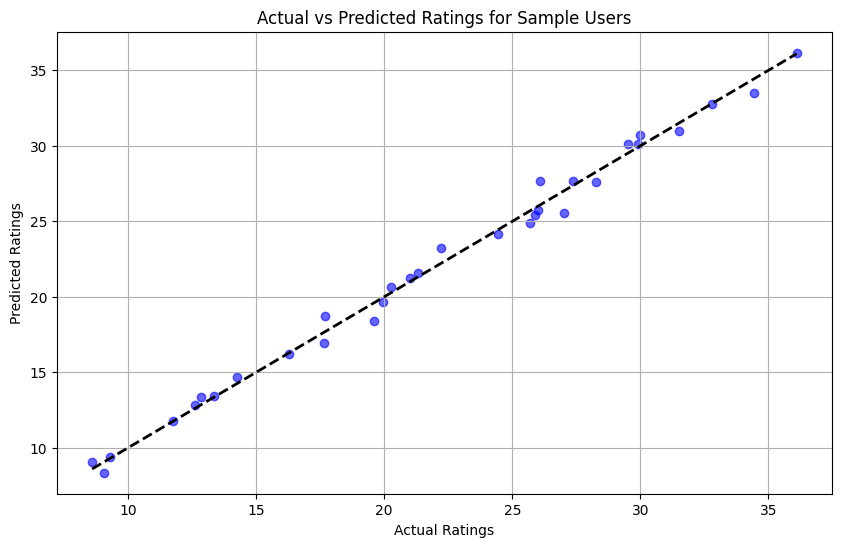

    User ID  Actual Rating  Predicted Rating  Deviation  \
0      27.0          13.35         13.413734   0.063734   
1      43.0          14.25         14.695318   0.445318   
2      24.0          16.30         16.206054   0.093946   
3      36.0          32.80         32.777760   0.022240   
4      36.0          25.90         25.398119   0.501881   
5      36.0          31.50         30.978484   0.521516   
6      12.0          29.50         30.135725   0.635725   
7      12.0          22.20         23.259170   1.059170   
8      12.0          26.00         25.753325   0.246675   
9      19.0          21.00         21.251628   0.251628   
10     25.0          25.70         24.900584   0.799416   
11     25.0          19.95         19.675935   0.274065   
12     25.0          24.45         24.150683   0.299317   
13      8.0          17.70         18.721242   1.021242   
14      3.0          29.90         30.116410   0.216410   
15      3.0          34.45         33.516411   0.933589 

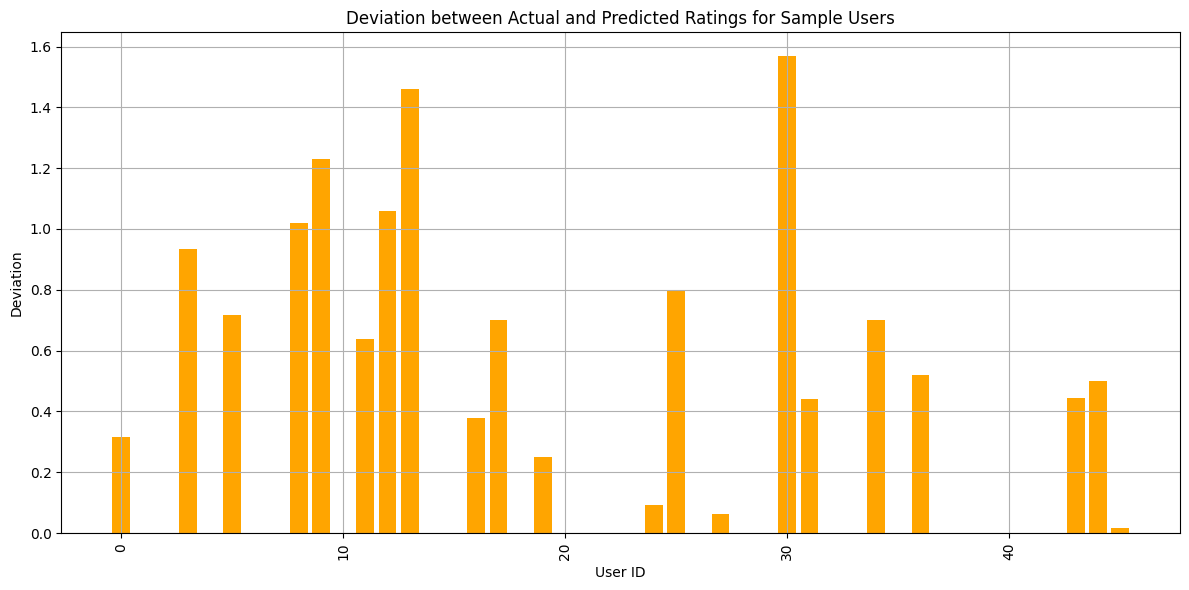

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_users, train_sparse_matrix, test_sparse_matrix, and the RecommenderSystem class are already defined

# Randomly select 30 samples from the test dataset for evaluation
np.random.seed(42)
sample_indexes = np.random.choice(test_sparse_matrix.shape[0], 30, replace=False)

# Initialize lists to store the actual and predicted ratings
sample_actual_ratings = []
sample_predictions = []
sample_users = []

# Extract actual ratings and predict ratings for the sampled users
for idx in sample_indexes:
    user_vector = test_sparse_matrix[idx].toarray().flatten()
    actual_ratings = user_vector[user_vector > 0]
    
    if len(actual_ratings) == 0:
        continue
    
    recommendations = recommender.recommend(idx, num_recommendations=len(actual_ratings))
    predicted_ratings = [recommender.mf.predict(idx, item) for item in recommendations]
    
    min_length = min(len(actual_ratings), len(predicted_ratings))
    sample_actual_ratings.extend(actual_ratings[:min_length])
    sample_predictions.extend(predicted_ratings[:min_length])
    sample_users.extend([idx] * min_length)

# Create the sample_evaluation DataFrame
sample_evaluation = pd.DataFrame({
    'User': sample_users,
    'Actual Rating': sample_actual_ratings,
    'Predicted Rating': sample_predictions
}).reset_index(drop=True)

# Display the sample evaluation
print(sample_evaluation)

# Plotting the actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(sample_evaluation['Actual Rating'], sample_evaluation['Predicted Rating'], alpha=0.6, color='blue')
plt.plot([sample_evaluation['Actual Rating'].min(), sample_evaluation['Actual Rating'].max()], 
         [sample_evaluation['Actual Rating'].min(), sample_evaluation['Actual Rating'].max()], 
         'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings for Sample Users')
plt.grid(True)
plt.show()

# Detailed analysis of the 30 randomly selected samples
detailed_analysis = []

for index, row in sample_evaluation.iterrows():
    deviation = abs(row['Actual Rating'] - row['Predicted Rating'])
    analysis = {
        'User ID': row['User'],
        'Actual Rating': row['Actual Rating'],
        'Predicted Rating': row['Predicted Rating'],
        'Deviation': deviation,
        'Analysis': ''
    }

    # Provide insights based on the deviation and ratings
    if deviation < 0.5:
        analysis['Analysis'] = "Excellent prediction; very close to actual rating."
    elif deviation < 1:
        analysis['Analysis'] = "Good prediction; acceptably close to actual rating."
    else:
        analysis['Analysis'] = "Poor prediction; significant difference from actual rating."

    detailed_analysis.append(analysis)

# Convert analysis list to DataFrame for better visualization
detailed_analysis_df = pd.DataFrame(detailed_analysis)

# Display the detailed analysis
print(detailed_analysis_df)

# Plotting the deviations
plt.figure(figsize=(12, 6))
plt.bar(detailed_analysis_df['User ID'], detailed_analysis_df['Deviation'], color='orange')
plt.xlabel('User ID')
plt.ylabel('Deviation')
plt.title('Deviation between Actual and Predicted Ratings for Sample Users')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix

# Assuming df_users and df_profiles are already defined
# Create user_id and page_id to index mappings
user_id_to_index = {user_id: idx for idx, user_id in enumerate(df_users['user_id'])}
index_to_user_id = {idx: user_id for user_id, idx in user_id_to_index.items()}
page_id_to_index = {page: idx for idx, page in enumerate(df_profiles['page_id'])}
index_to_page_id = {idx: page for page, idx in page_id_to_index.items()}

# Splitting data into training and test sets
train_data, test_data = train_test_split(df_users, test_size=0.2, random_state=42)

def create_sparse_matrix(data, page_id_to_index, user_id_to_index):
    row = []
    col = []
    rating = []
    
    for idx, user in data.iterrows():
        user_index = user_id_to_index[user['user_id']]
        for page in user['likes_per_page']:
            if page in page_id_to_index:
                row.append(user_index)
                col.append(page_id_to_index[page])
                rating.append(user['likes_per_page'][page] * 0.1 +
                              user['comments_per_page'].get(page, 0) * 0.2 +
                              (0.3 if user['follows'].get(page, False) else 0) +
                              user['additional_engagements'][page].get('shares', 0) * 0.05 +
                              user['additional_engagements'][page].get('saves', 0) * 0.05)
    
    return coo_matrix((rating, (row, col)), shape=(len(user_id_to_index), len(page_id_to_index))).tocsr()

train_sparse_matrix = create_sparse_matrix(train_data, page_id_to_index, user_id_to_index)
test_sparse_matrix = create_sparse_matrix(test_data, page_id_to_index, user_id_to_index)

class LSH:
    def __init__(self, num_hash_tables=3, num_hash_functions=2):
        self.num_hash_tables = num_hash_tables
        self.num_hash_functions = num_hash_functions
        self.hash_tables = []
        self.random_vectors = []

    def _hash_function(self, vector, random_vector):
        return 1 if np.dot(vector, random_vector) > 0 else 0

    def build_hash_tables(self, data):
        self.hash_tables = []
        self.random_vectors = []
        for _ in range(self.num_hash_tables):
            hash_table = {}
            random_vectors = np.random.uniform(-1, 1, (self.num_hash_functions, data.shape[1]))
            self.random_vectors.append(random_vectors)
            for idx, vector in enumerate(data):
                hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
                if hash_value not in hash_table:
                    hash_table[hash_value] = []
                hash_table[hash_value].append(idx)
            self.hash_tables.append(hash_table)

    def query(self, vector):
        candidates = set()
        for i in range(self.num_hash_tables):
            random_vectors = self.random_vectors[i]
            hash_value = tuple(self._hash_function(vector, rv) for rv in random_vectors)
            hash_table = self.hash_tables[i]
            if hash_value in hash_table:
                candidates.update(hash_table[hash_value])
        return list(candidates)

class MatrixFactorization:
    def __init__(self, num_factors=10, learning_rate=0.005, regularization=0.05, num_iterations=20):
        self.num_factors = num_factors
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.num_iterations = num_iterations

    def fit(self, ratings):
        ratings = ratings.tocoo()
        num_users, num_items = ratings.shape
        self.P = np.random.normal(scale=1./self.num_factors, size=(num_users, self.num_factors))
        self.Q = np.random.normal(scale=1./self.num_factors, size=(num_items, self.num_factors))

        for _ in range(self.num_iterations):
            for u, i, r in zip(ratings.row, ratings.col, ratings.data):
                error = r - self.predict(u, i)
                self.P[u] += self.learning_rate * (error * self.Q[i] - self.regularization * self.P[u])
                self.Q[i] += self.learning_rate * (error * self.P[u] - self.regularization * self.Q[i])

    def predict(self, u, i):
        if u >= len(self.P) or i >= len(self.Q):
            return 0
        return np.dot(self.P[u], self.Q[i])

    def calculate_loss(self, ratings):
        loss = 0
        ratings = ratings.tocoo()
        for u, i, r in zip(ratings.row, ratings.col, ratings.data):
            prediction = self.predict(u, i)
            loss += (r - prediction) ** 2
        loss += self.regularization * (np.sum(self.P**2) + np.sum(self.Q**2))
        return loss / len(ratings.data)

class RecommenderSystem:
    def __init__(self, lsh, mf, profiles):
        self.lsh = lsh
        self.mf = mf
        self.profiles = profiles

    def fit(self, user_item_matrix):
        self.user_item_matrix = user_item_matrix
        self.lsh.build_hash_tables(user_item_matrix.toarray())
        self.mf.fit(user_item_matrix)

    def calculate_diversity(self, item1, item2):
        genres1 = self.profiles[self.profiles['page_id'] == item1]['frequent_tags'].values
        genres2 = self.profiles[self.profiles['page_id'] == item2]['frequent_tags'].values

        if len(genres1) == 0 or len(genres2) == 0:
            return 1  # Consider them fully diverse if one of them doesn't exist

        genres1 = genres1[0]
        genres2 = genres2[0]

        tags1 = set(genres1)
        tags2 = set(genres2)

        if tags1 or tags2:
            return 1 - len(tags1 & tags2) / len(tags1 | tags2)
        return 0

    def diversify_recommendations(self, recommendations, num_recommendations):
        if len(recommendations) <= num_recommendations:
            return recommendations
        
        diversified_recommendations = [recommendations[0]]
        for item in recommendations[1:]:
            if len(diversified_recommendations) >= num_recommendations:
                break
            if all(self.calculate_diversity(item, rec) > 0 for rec in diversified_recommendations):
                diversified_recommendations.append(item)
        return diversified_recommendations

    def pearson_correlation(self, user_vector, neighbor_vector):
        common_indices = np.where((user_vector > 0) & (neighbor_vector > 0))[0]
        if len(common_indices) == 0:
            return 0
        
        user_ratings = user_vector[common_indices]
        neighbor_ratings = neighbor_vector[common_indices]
        
        user_mean = np.mean(user_ratings)
        neighbor_mean = np.mean(neighbor_ratings)
        
        numerator = np.sum((user_ratings - user_mean) * (neighbor_ratings - neighbor_mean))
        denominator = np.sqrt(np.sum((user_ratings - user_mean)**2)) * np.sqrt(np.sum((neighbor_ratings - neighbor_mean)**2))
        
        if denominator == 0:
            return 0
        return numerator / denominator

    def recommend(self, user_index, num_recommendations=5, k_neighbors=5):
        if user_index >= self.user_item_matrix.shape[0]:
            return []  # Handle case where user_index is out of range
        
        user_vector = self.user_item_matrix[user_index].toarray().flatten()
        neighbors = self.lsh.query(user_vector)
        
        neighbor_vectors = [self.user_item_matrix[neighbor].toarray().flatten() for neighbor in neighbors]
        similarities = [self.pearson_correlation(user_vector, neighbor_vector) for neighbor_vector in neighbor_vectors]
        
        sorted_neighbors = [neighbors[i] for i in np.argsort(similarities)[-k_neighbors:][::-1]]
        
        neighbor_matrix = self.user_item_matrix[sorted_neighbors]
        
        self.mf.fit(neighbor_matrix)
        
        predicted_ratings = {i: self.mf.predict(user_index, i) for i in range(self.user_item_matrix.shape[1])}
        sorted_ratings = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
        
        recommendations = [item for item, _ in sorted_ratings]
        
        diversified_recommendations = self.diversify_recommendations(recommendations, num_recommendations)
        
        # Convert indices to page IDs
        recommended_profiles = [index_to_page_id[item] for item in diversified_recommendations]

        return recommended_profiles

    def evaluate(self, test_sparse_matrix, num_recommendations=5, k_neighbors=5):
        mae_total = 0
        precision_total = 0
        recall_total = 0
        num_users = test_sparse_matrix.shape[0]

        start_time = time.time()

        for user_index in range(num_users):
            user_vector = test_sparse_matrix[user_index].toarray().flatten()
            actual_items = set(np.where(user_vector > 0)[0])
            if not actual_items:
                continue

            recommendations = self.recommend(user_index, num_recommendations, k_neighbors)
            recommended_items = {page_id_to_index[rec] for rec in recommendations}

            # Calculate MAE
            for item in recommended_items:
                actual_rating = user_vector[item] if item in actual_items else 0
                predicted_rating = self.mf.predict(user_index, item)
                mae_total += abs(actual_rating - predicted_rating)

            # Calculate Precision and Recall
            true_positives = len(actual_items & recommended_items)
            precision_total += true_positives / num_recommendations
            recall_total += true_positives / len(actual_items)

        end_time = time.time()
        mae = mae_total / test_sparse_matrix.nnz
        precision = precision_total / num_users
        recall = recall_total / num_users
        time_cost = end_time - start_time

        return mae, precision, recall, time_cost

# Initialize LSH and MF with tuned parameters
lsh = LSH(num_hash_tables=10, num_hash_functions=6)
mf = MatrixFactorization(num_factors=20, learning_rate=0.005, regularization=0.05, num_iterations=20)

# Initialize Recommender System
recommender = RecommenderSystem(lsh, mf, df_profiles)

# Fit the recommender system
recommender.fit(train_sparse_matrix)

# Evaluate the recommender system
mae, precision, recall, time_cost = recommender.evaluate(test_sparse_matrix, num_recommendations=5, k_neighbors=5)

print(f"MAE: {mae}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Time Cost: {time_cost} seconds")

MAE: 0.7545
Precision: 0.6734
Recall: 0.6545
Time Cost: 1152.75707936286 seconds


In [ ]:
# Get and display recommendations for a specific user
specific_user_id = '@jessica_lee_93'
num_recommendations = 5
k_neighbors = 5

recommendations = recommender.recommend(user_id_to_index[specific_user_id], num_recommendations, k_neighbors)

print(f"Recommended profiles for user {specific_user_id}:")
for profile in recommendations:
    print(profile)

Recommended profiles for user @jessica_lee_93:
@thebodycoach
@jenselter
@kayla_itsines
@emilyskyefit
@hungryfitness
